In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

% matplotlib inline

In [2]:
folder = "../../weekly_updates/aug6/"

In [21]:
train1 = pd.read_csv(folder+ "run-cm_u_08_05_3_train-tag-total_loss.csv")
eval1 = pd.read_csv(folder + "run-cm_u_08_05_3_eval-tag-total_loss.csv")

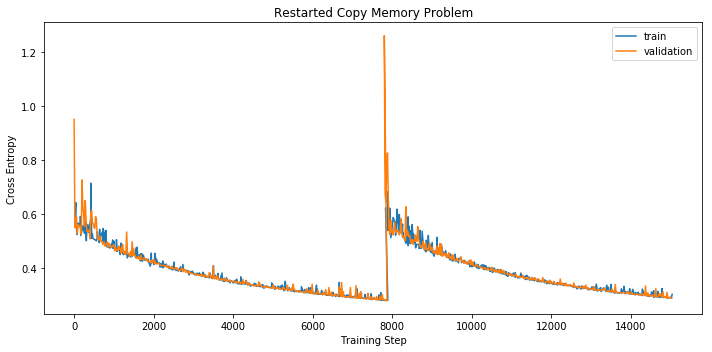

In [24]:
plt.figure(figsize=(10,5))
plt.plot(train1.Step, train1.Value, label="train")
plt.plot(eval1.Step, eval1.Value, label="validation")

plt.title("Restarted Copy Memory Problem")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Step")
plt.legend()

plt.tight_layout()

plt.savefig(folder+"restarted_memory.png", dpi=300)

plt.show()

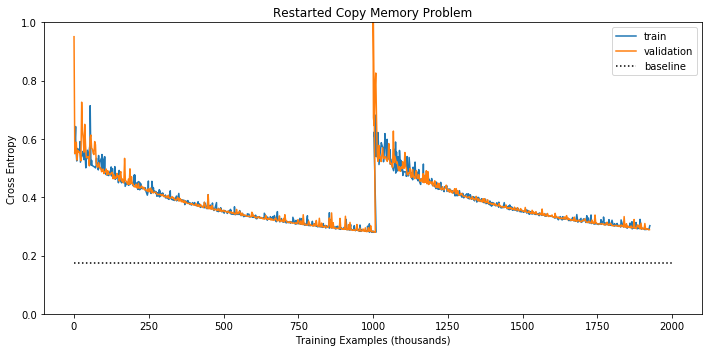

In [35]:
plt.figure(figsize=(10,5))
plt.plot(train1.Step*128/1000, train1.Value, label="train")
plt.plot(eval1.Step*128/1000, eval1.Value, label="validation")

plt.plot(np.linspace(0,2000), [10*np.log(8)/120]*50, ':', color="black", label="baseline")

plt.title("Restarted Copy Memory Problem")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Examples (thousands)")
plt.legend()

plt.ylim([0,1])

plt.tight_layout()

plt.savefig(folder+"restarted_memory_examples.png", dpi=300)

plt.show()

In [48]:
lstm_tr = pd.read_csv(folder+ "lstm-run-08_07_1_train-tag-total_loss.csv")
lstm_e = pd.read_csv(folder + "lstm-run-08_07_1_eval-tag-total_loss.csv")

simplernn_tr = pd.read_csv(folder+ "simplernn-run-08_07_1_train-tag-total_loss.csv")
simplernn_e = pd.read_csv(folder + "simplernn-run-08_07_1_eval-tag-total_loss.csv")

urnn_tr = pd.read_csv(folder+ "urnn-run-08_07_1_train-tag-total_loss.csv")
urnn_e = pd.read_csv(folder + "urnn-run-08_07_1_eval-tag-total_loss.csv")

<Figure size 432x288 with 0 Axes>

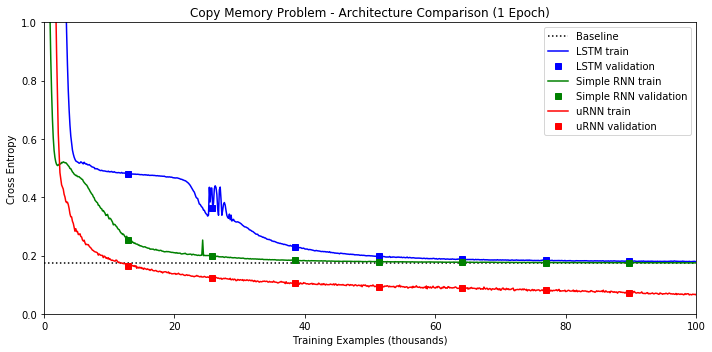

In [49]:
plt.clf()
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,100), [10*np.log(8)/120]*50, ':', color="black", label="Baseline")

# lstm
plt.plot(lstm_tr.Step*128/1000, lstm_tr.Value, color="blue", label="LSTM train")
plt.plot(lstm_e.Step*128/1000, lstm_e.Value, 's', color="blue",label="LSTM validation")

# simple RNN
plt.plot(simplernn_tr.Step*128/1000, simplernn_tr.Value, color="green", label="Simple RNN train")
plt.plot(simplernn_e.Step*128/1000, simplernn_e.Value, 's', color="green",label="Simple RNN validation")

# uRNN
plt.plot(urnn_tr.Step*128/1000, urnn_tr.Value, color="red", label="uRNN train")
plt.plot(urnn_e.Step*128/1000, urnn_e.Value, 's', color="red",label="uRNN validation")


plt.title("Copy Memory Problem - Architecture Comparison (1 Epoch)")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Examples (thousands)")
plt.legend()

plt.ylim([0,1])
plt.xlim([0,100])

plt.tight_layout()

plt.savefig(folder+"cm_comparison_architecture.png", dpi=300)

plt.show()

In [19]:
(simplernn_tr.iloc[-1,0] - simplernn_tr.iloc[0,0])/len(simplernn_tr)

0.9811375885058546

In [26]:
rms_tr = pd.read_csv(folder+"rmsprop-nitro-cm_urnn_08_07_3_train-tag-total_loss.csv")
rms_e = pd.read_csv(folder+"rmsprop-nitro-cm_urnn_08_07_3_eval-tag-total_loss.csv")

adam_tr = pd.read_csv(folder+"adam-nitro-cm_urnn_08_07_5_train-tag-total_loss.csv")
adam_e = pd.read_csv(folder+"adam-nitro-cm_urnn_08_07_5_eval-tag-total_loss.csv")

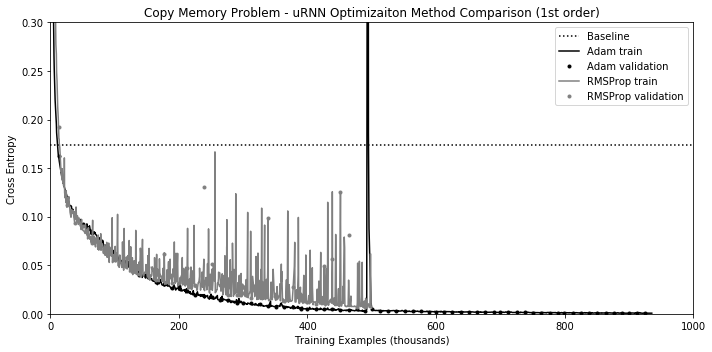

In [43]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,len(adam_tr)), [10*np.log(8)/120]*50, ':', color="black", label="Baseline")

# adam
plt.plot(adam_tr.Step*128/1000, adam_tr.Value, color="black", label="Adam train")
plt.plot(adam_e.Step*128/1000, adam_e.Value, '.', color="black",label="Adam validation")

# rmsprop
plt.plot(rms_tr.Step*128/1000, rms_tr.Value, color="gray", label="RMSProp train")
plt.plot(rms_e.Step*128/1000, rms_e.Value, '.', color="gray",label="RMSProp validation")


plt.title("Copy Memory Problem - uRNN Optimizaiton Method Comparison (1st order)")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Examples (thousands)")
plt.legend()

plt.ylim([0,0.3])
plt.xlim([0,1000])

plt.tight_layout()

plt.savefig(folder+"cm_comparison_methods.png", dpi=300)

plt.show()